# autobiocoherence

In [1]:
import os
import xarray as xr

# Define the path to the folder containing the NetCDF files
folder_path = '/Users/lb962/Downloads/ESL/GESLA/data/ERA5hourly'

# Get a list of all NetCDF files in the folder
nc_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.nc')]

# Open all NetCDF files as a single xarray Dataset
ERA5_dataset = xr.open_mfdataset(nc_files)

In [2]:
ERA5_dataset

<xarray.Dataset>
Dimensions:    (longitude: 107, latitude: 73, time: 227904)
Coordinates:
  * longitude  (longitude) float32 -11.5 -11.25 -11.0 -10.75 ... 14.5 14.75 15.0
  * latitude   (latitude) float32 48.0 48.25 48.5 48.75 ... 65.5 65.75 66.0
  * time       (time) datetime64[ns] 1981-01-01 ... 2014-12-31T23:00:00
Data variables:
    u10        (time, latitude, longitude) float32 dask.array<chunksize=(8760, 73, 107), meta=np.ndarray>
    v10        (time, latitude, longitude) float32 dask.array<chunksize=(8760, 73, 107), meta=np.ndarray>
    mdts       (time, latitude, longitude) float32 dask.array<chunksize=(8760, 73, 107), meta=np.ndarray>
    mpts       (time, latitude, longitude) float32 dask.array<chunksize=(8760, 73, 107), meta=np.ndarray>
    mwd        (time, latitude, longitude) float32 dask.array<chunksize=(8760, 73, 107), meta=np.ndarray>
    mwp        (time, latitude, longitude) float32 dask.array<chunksize=(8760, 73, 107), meta=np.ndarray>
    sst        (time, latitude, longitude) float32 dask.array<chunksize=(8760, 73, 107), meta=np.ndarray>
    shts       (time, latitude, longitude) float32 dask.array<chunksize=(8760, 73, 107), meta=np.ndarray>
    shww       (time, latitude, longitude) float32 dask.array<chunksize=(8760, 73, 107), meta=np.ndarray>
    sp         (time, latitude, longitude) float32 dask.array<chunksize=(8760, 73, 107), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-03-23 02:58:52 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [7]:
# Assuming ERA5_dataset is your xarray dataset containing the ERA5 data
import numpy as np

# Select random longitude and latitude indices
lon_index = np.random.choice(ERA5_dataset.longitude.size)
lat_index = np.random.choice(ERA5_dataset.latitude.size)

# Extract the corresponding longitude and latitude values
random_lon = ERA5_dataset.longitude.values[lon_index]
random_lat = ERA5_dataset.latitude.values[lat_index]

# Select data at the random longitude and latitude
selected_data = ERA5_dataset.sel(longitude=random_lon, latitude=random_lat, method='nearest')

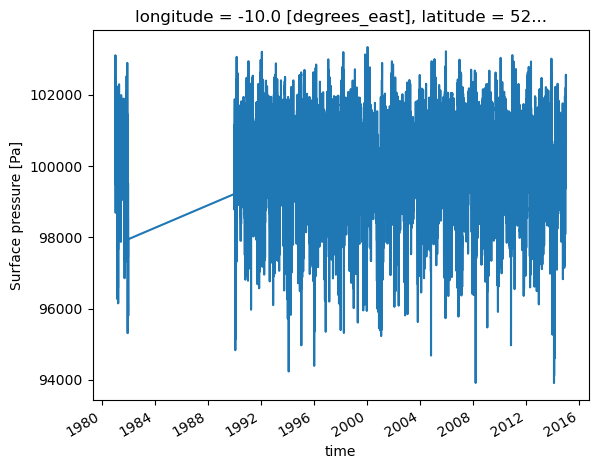

In [11]:
selected_data.sp.plot()

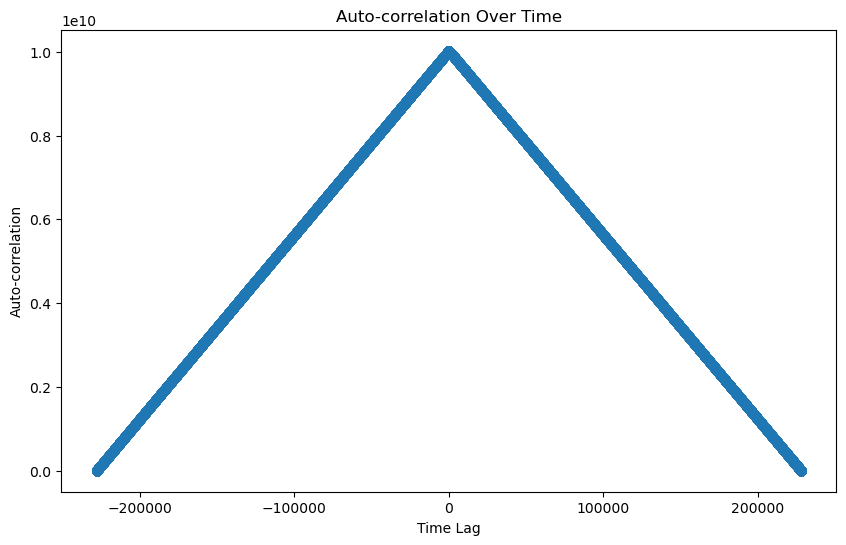

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def plot_auto_correlation_over_time(data):
    # Calculate auto-correlation function
    acf = np.correlate(data, data, mode='full') / len(data)

    # Calculate time lags
    time_lags = np.arange(-len(data) + 1, len(data))

    # Plot ACF
    plt.figure(figsize=(10, 6))
    plt.plot(time_lags, acf, marker='o')  # Adjust length of ACF array
    plt.title("Auto-correlation Over Time")
    plt.xlabel("Time Lag")
    plt.ylabel("Auto-correlation")
    plt.show()

# Example usage:
plot_auto_correlation_over_time(selected_data.sp)

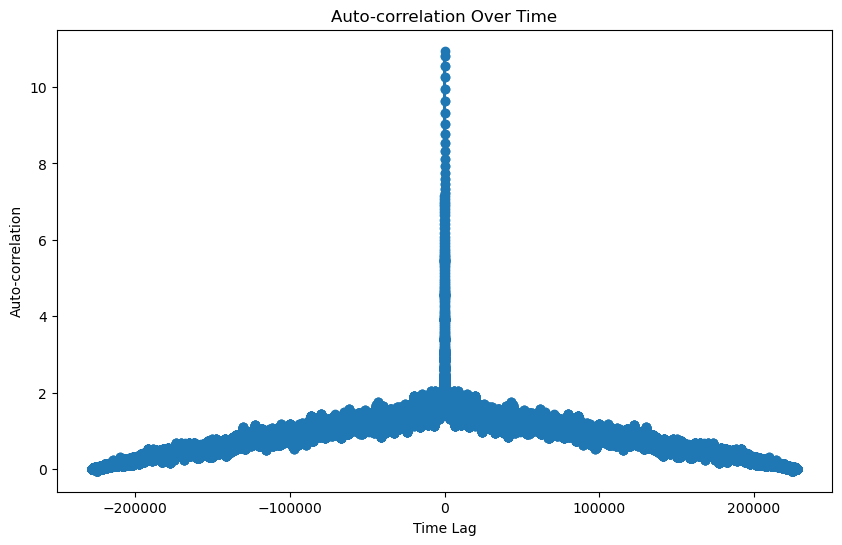

/var/folders/2b/rpgq1g5d5qz2nhbpj5s4jnrc0000gq/T/ipykernel_94336/2512393653.py:20: RuntimeWarning: divide by zero encountered in log10
  log_time_lags = np.log10(time_lags)
/var/folders/2b/rpgq1g5d5qz2nhbpj5s4jnrc0000gq/T/ipykernel_94336/2512393653.py:20: RuntimeWarning: invalid value encountered in log10
  log_time_lags = np.log10(time_lags)
/var/folders/2b/rpgq1g5d5qz2nhbpj5s4jnrc0000gq/T/ipykernel_94336/2512393653.py:21: RuntimeWarning: invalid value encountered in log10
  log_acf = np.log10(acf)


In [21]:
import numpy as np
import matplotlib.pyplot as plt

def plot_auto_correlation_over_time(data):
    # Calculate auto-correlation function
    acf = np.correlate(data, data, mode='full') / len(data)

    # Calculate time lags
    time_lags = np.arange(-len(data) + 1, len(data))

    # Plot ACF
    plt.figure(figsize=(10, 6))
    plt.plot(time_lags, acf, marker='o')  # Adjust length of ACF array
    plt.title("Auto-correlation Over Time")
    plt.xlabel("Time Lag")
    plt.ylabel("Auto-correlation")
    plt.show()

    # Compute the logarithm of the time lags and autocorrelation
    log_time_lags = np.log10(time_lags)
    log_acf = np.log10(acf)

    return log_time_lags, log_acf

# Example usage:
log_time_lags, log_acf = plot_auto_correlation_over_time(selected_data.u10)
    

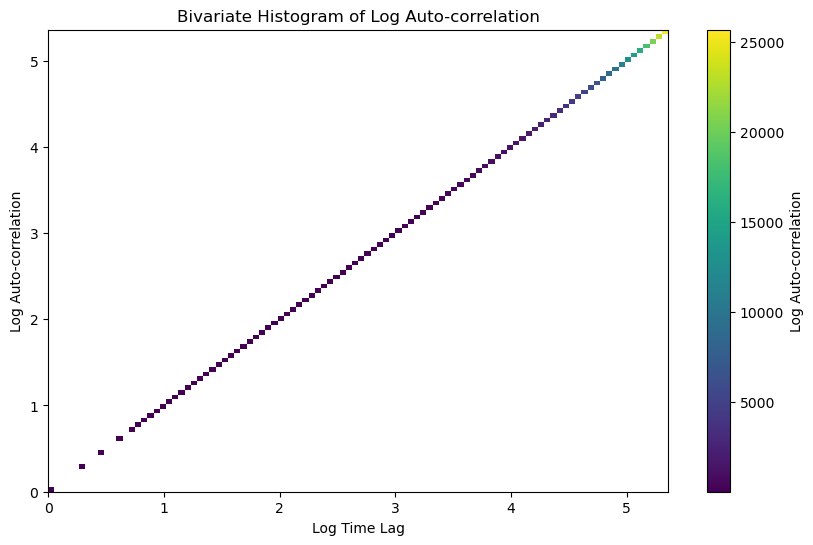

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming log_time_lags and log_acf are provided

# Add a small constant to avoid zeros
epsilon = 1e-10
log_time_lags = log_time_lags + epsilon
log_acf = log_acf + epsilon

# Clip data to ensure positivity
log_time_lags = np.clip(log_time_lags, epsilon, None)
log_acf = np.clip(log_acf, epsilon, None)

# Create a bivariate histogram
plt.figure(figsize=(10, 6))
plt.hist2d(log_time_lags, log_time_lags, bins=100, cmap='viridis', cmin=1) 
plt.colorbar(label='Log Auto-correlation')
plt.title("Bivariate Histogram of Log Auto-correlation")
plt.xlabel("Log Time Lag")
plt.ylabel("Log Auto-correlation")
plt.show()


In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming log_time_lags and log_acf are provided

# Define the range of log time lags
log_time_lags_min = np.min(log_time_lags)
log_time_lags_max = np.max(log_time_lags)
log_time_lags_range = np.linspace(log_time_lags_min, log_time_lags_max, 100)

# Create a grid of log time lags
X, Y = np.meshgrid(log_time_lags_range, log_time_lags_range)

# Initialize array to store autocorrelation values
auto_correlation = np.zeros_like(X)

# Calculate the autocorrelation values for each combination
for i in range(len(log_time_lags_range)):
    for j in range(len(log_time_lags_range)):
        lag1 = log_time_lags_range[i]
        lag2 = log_time_lags_range[j]
        # Calculate autocorrelation
        auto_correlation[i, j] = np.correlate(lag1, lag2, mode='full')  # Example using np.correlate()

# Plot the grid with autocorrelation values
plt.figure(figsize=(10, 6))
plt.pcolormesh(X, Y, auto_correlation, cmap='viridis')
plt.colorbar(label='Log Auto-correlation')
plt.title("Grid of Log Auto-correlation")
plt.xlabel("Log Time Lag 1")
plt.ylabel("Log Time Lag 2")
plt.show()


ValueError: object of too small depth for desired array

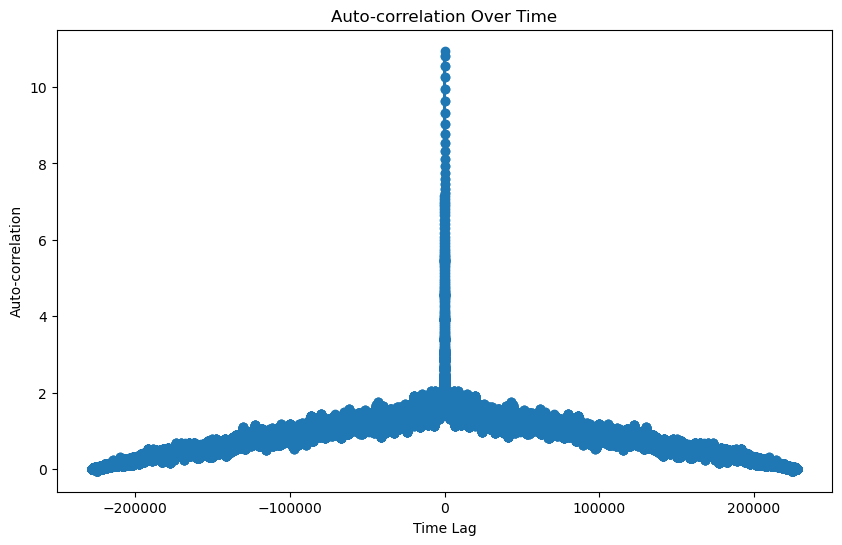

In [18]:
# Example usage:
plot_auto_correlation_over_time(selected_data.u10)

In [1]:
import pandas as pd

# Load the pickle file
final_df = pd.read_pickle("/Users/lb962/Downloads/ESL/GESLA/data/ml_ready/Northseahourly.pkl")

In [2]:
import xarray as xr
import numpy as np
file_path = "/Users/lb962/Downloads/ESL/GESLA/data/processed/GESLA/interim/GESLA3_NorthSeaShort.nc"
# Open the dataset
GESLA_ns_dataset = xr.open_dataset(file_path)

# Filter dataset for the year 2014
#filtered_ds = GESLGESLA_ns_datasetA_ns_dataset.sel(date_time=(GESLA_ns_dataset['date_time'].dt.year == 2014))
filtered_ds = GESLA_ns_dataset
# Assuming ns_data is your xarray Dataset
sea_level = filtered_ds["sea_level"]

# Set sea level values to NaN where they are below -1 or above 15
sea_level_filtered = sea_level.where((sea_level > -1) & (sea_level < 15), np.nan)
filtered_ds["q_sea_level"] = sea_level_filtered

In [3]:
filtered_ds

<xarray.Dataset>
Dimensions:                  (date_time: 7088554, station: 382)
Coordinates:
  * date_time                (date_time) datetime64[ns] 1800-01-01T07:40:00 ....
  * station                  (station) int64 0 1 2 3 4 5 ... 377 378 379 380 381
Data variables: (12/28)
    sea_level                (station, date_time) float64 nan nan ... nan nan
    qc_flag                  (station, date_time) float64 ...
    use_flag                 (station, date_time) float64 ...
    filename                 (station) object ...
    site_name                (station) object ...
    site_code                (station) object ...
    ...                       ...
    instrument               (station) object ...
    precision                (station) object ...
    null_value               (station) float64 ...
    gauge_type               (station) object ...
    overall_record_quality   (station) object ...
    q_sea_level              (station, date_time) float64 nan nan ... nan nan

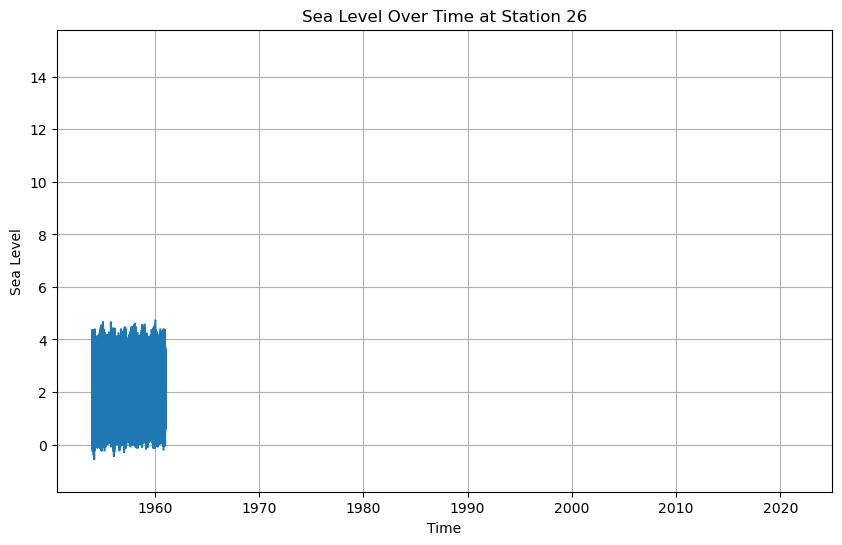

In [4]:
import matplotlib.pyplot as plt

# Select data for station 1
station_1_data = filtered_ds.sel(station=26)    

# Plot sea level over time
plt.figure(figsize=(10, 6))
plt.plot(station_1_data['date_time'], station_1_data['q_sea_level'])
plt.title('Sea Level Over Time at Station 26')
plt.xlabel('Time')
plt.ylabel('Sea Level')
plt.grid(True)
plt.show()

In [45]:
sea_level = filtered_ds.sel(station=26)['q_sea_level']

# Compute autocorrelation using NumPy
autocorr = np.correlate(sea_level, sea_level, mode='full')

# Plot autocorrelation
plt.figure(figsize=(10, 6))
plt.plot(autocorr)
plt.title('Autocorrelation of Sea Level Signal')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

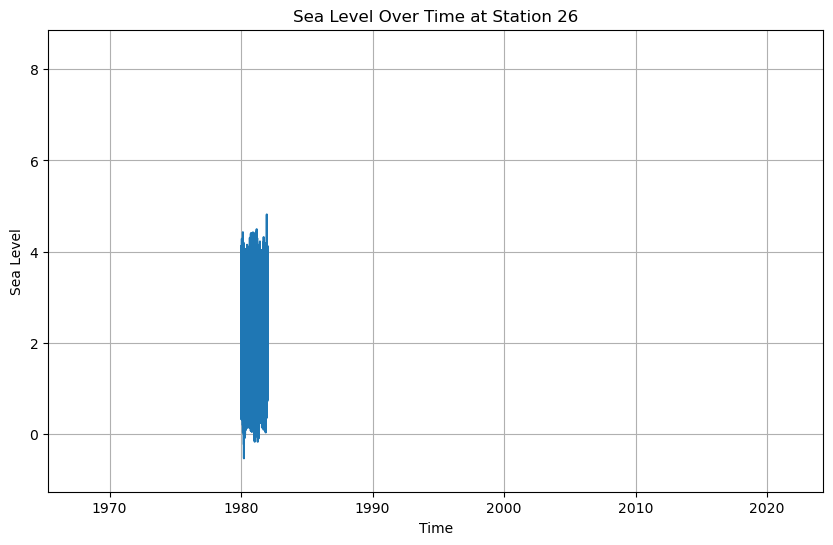

In [48]:
import matplotlib.pyplot as plt

# Select data for station 1
station_1_data = filtered_ds.sel(station=15)    

# Plot sea level over time
plt.figure(figsize=(10, 6))
plt.plot(station_1_data['date_time'], station_1_data['q_sea_level'])
plt.title('Sea Level Over Time at Station 26')
plt.xlabel('Time')
plt.ylabel('Sea Level')
plt.grid(True)
plt.show()

In [49]:
sea_level = filtered_ds.sel(station=15)['q_sea_level']

# Compute autocorrelation using NumPy
autocorr = np.correlate(sea_level, sea_level, mode='full')

# Plot autocorrelation
plt.figure(figsize=(10, 6))
plt.plot(autocorr)
plt.title('Autocorrelation of Sea Level Signal')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()